# EDA Marine Microplastics

## Librerías y carga de archivos

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para cargar un data en mysql

import mysql.connector
from mysql.connector import errorcode

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
df_clean = pd.read_csv("../../Archivos/Clean_Marine_Microplastics.csv")
df_clean.head()

,OBJECTID,Oceans,Regions,Sampling Method,Measurement,Unit,Density Range,Density Class,Short Reference,Long Reference,DOI,Organization,Keywords,Accession Number,Accession Link,Latitude,Longitude,Date,GlobalID,Density_Center,Year,Month
0,9676,Atlantic Ocean,NaN,Grab sample,0.018,pieces/m3,0.005-1,Medium,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,-31.696000,-48.560000,2015-08-11,a77121b2-e113-444e-82d9-7af11d62fdd2,0.50250,2015,8
1,6427,Pacific Ocean,NaN,Neuston net,0.000,pieces/m3,0-0.0005,Very Low,Law et al.2014,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,6.350000,-121.850000,2002-12-18,be27c450-02ca-4261-8d89-cae21108e6cc,0.00025,2002,12
2,10672,Pacific Ocean,NaN,Manta net,0.013,pieces/m3,0.005-1,Medium,Goldstein et al.2013,"Goldstein, M.C., A.J. Titmus, M. Ford. 2013. S...",https://doi.org/10.1371/journal.pone.0080020,Scripps Institution of Oceanography-University...,Great Pacific Garbage Patch/SEAPLEX,253448,https://www.ncei.noaa.gov/access/metadata/land...,0.500000,-95.350000,2006-10-17,23effcdd-35b7-4e1e-adb4-390693a287d3,0.50250,2006,10
3,13921,Atlantic Ocean,NaN,Aluminum bucket,1368.000,pieces/m3,10,Very High,Queiroz et al.2022,"Queiroz, A.F.dos S., A.S. da Conceição, D. Che...",https://doi.org/10.1016/j.scitotenv.2022.156259,"Federal University of Pará, Brazil",Amazon Continental Shelf,276482,https://www.ncei.noaa.gov/access/metadata/land...,0.631825,-45.398158,2018-10-17,16d77822-0533-4116-97b9-0bdb592f3d6e,10.00000,2018,10
4,9344,Pacific Ocean,NaN,Grab sample,0.001,pieces/m3,0.0005-0.005,Low,Barrows et al.2018,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",https://doi.org/10.1016/j.envpol.2018.02.062,Adventure Scientist,Adventure Scientist/Citizen Science,211009,https://www.ncei.noaa.gov/access/metadata/land...,16.623000,-99.697800,2015-01-03,b9e435e3-9e86-4143-8b51-877e5dcdc7a6,0.00275,2015,1


## Creación base de datos MySQL y carga de datos

In [3]:
# CREAMOS LA BASE DE DATOS EN MYSQL:
"""
CREATE DATABASE IF NOT EXISTS microplastic_data;
USE microplastic_data;


CREATE TABLE samples (
    OBJECTID INT PRIMARY KEY,
    Oceans VARCHAR(100),
    Regions VARCHAR(100),
    Sampling_Method VARCHAR(100),
    Measurement FLOAT8,
    Unit VARCHAR(50),
    Density_Range VARCHAR(50),
    Density_Class VARCHAR(50),
    Short_Reference VARCHAR(255),
    Organization VARCHAR(255),
    Keywords TEXT,
    Accession_Number VARCHAR(100),
    Accession_Link VARCHAR(255),
    Latitude DECIMAL(9,6),
    Longitude DECIMAL(9,6),
    Date DATE,
    GlobalID CHAR(36),
    Density_center FLOAT,
    Year INT,
    Month INT);"""

'\nCREATE DATABASE IF NOT EXISTS microplastic_data;\nUSE microplastic_data;\n\n\nCREATE TABLE samples (\n    OBJECTID INT PRIMARY KEY,\n    Oceans VARCHAR(100),\n    Regions VARCHAR(100),\n    Sampling_Method VARCHAR(100),\n    Measurement FLOAT8,\n    Unit VARCHAR(50),\n    Density_Range VARCHAR(50),\n    Density_Class VARCHAR(50),\n    Short_Reference VARCHAR(255),\n    Organization VARCHAR(255),\n    Keywords TEXT,\n    Accession_Number VARCHAR(100),\n    Accession_Link VARCHAR(255),\n    Latitude DECIMAL(9,6),\n    Longitude DECIMAL(9,6),\n    Date DATE,\n    GlobalID CHAR(36),\n    Density_center FLOAT,\n    Year INT,\n    Month INT);'

In [4]:
# Para evitar conflictos en SQL, necesito sustituir los espacios en las columnas por "_":

df_clean.columns = df_clean.columns.str.strip().str.lower().str.replace(' ', '_')


In [5]:
lista_microp= df_clean.values.tolist()

In [6]:
# Reemplaza NaN con None para que MySQL lo interprete como NULL
lista_microp = [[None if isinstance(i, float) and np.isnan(i) else i for i in tupla] for tupla in lista_microp]

""" Si lista_de_tuplas contiene valores NaN (de pandas), MySQL no puede insertarlos."
"Para corregirlo, reemplaza NaN por NULL antes de la inserción:"""

' Si lista_de_tuplas contiene valores NaN (de pandas), MySQL no puede insertarlos."\n"Para corregirlo, reemplaza NaN por NULL antes de la inserción:'

In [7]:
query = """
INSERT INTO samples (
    objectid, oceans, regions, sampling_method, measurement, unit,
    density_range, density_class, short_reference, long_reference,
    doi, organization, keywords, accession_number, accession_link,
    latitude, longitude, date, globalid, density_center, year, month
) VALUES (
    %s, %s, %s, %s, %s, %s,
    %s, %s, %s, %s, %s, %s,
    %s, %s, %s, %s, %s, %s,
    %s, %s, %s, %s
)
"""

In [8]:
#Carga de la base de datos limpia a MySQL
# Creamos una base de datos en My SQL y una tabla correspondiente a nuestro csv.

#BBDD : microplastic_data
#Tabla: samples

cnx = mysql.connector.connect(user='root', password='AlumnaAdalab',
                              host='127.0.0.1',
                              database ='microplastic_data',auth_plugin='mysql_native_password')

mycursor = cnx.cursor()

In [9]:
# Insertar múltiples registros utilizando ejecutemany()
# mycursor.executemany(query,lista_microp)

"""ESTA PARTE LA TENGO COMENTADA PARA QUE NO
SE EJECUTE EN UN DESCUIDO, YA QUE TENEMOS LA
BASE DE DATOS YA CARGADA"""

# Confirmar los cambios en la base de datos
# cnx.commit()

# print("Datos insertados correctamente ✅.")
# print(mycursor.rowcount, "registros insertados")

'ESTA PARTE LA TENGO COMENTADA PARA QUE NO\nSE EJECUTE EN UN DESCUIDO, YA QUE TENEMOS LA\nBASE DE DATOS YA CARGADA'

## Questions

In [10]:
#¿Cuántos registros únicos hay en el dataset?

total_registros = df_clean.shape[0]
duplicados = df_clean.duplicated().sum()
registros_unicos = total_registros - duplicados

print(f"Total de registros: {total_registros}")
print(f"Duplicados: {duplicados}")
print(f"Registros únicos: {registros_unicos}")


Total de registros: 20425
Duplicados: 0
Registros únicos: 20425


In [11]:
#¿Cuáles son los océanos con más muestras registradas?

df_clean['oceans'].value_counts()

oceans
Atlantic Ocean    15497
Pacific Ocean      4730
Arctic Ocean        178
Indian Ocean         20
Name: count, dtype: int64

In [12]:
#¿Cuántas regiones distintas hay por océano?

df_clean.groupby('oceans')['regions'].nunique()

oceans
Arctic Ocean      10
Atlantic Ocean    23
Indian Ocean       2
Pacific Ocean     11
Name: regions, dtype: int64

In [13]:
regiones_por_oceano = df_clean.groupby('oceans')['regions'].unique()

for oceano, regiones in regiones_por_oceano.items():
    print(f"\n🌊 {oceano} ({len(regiones)} regiones):")
    for region in regiones:
        print(f"   - {region}")

        # Cuenta una de mas, porque cuenta nan como valor único.



🌊 Arctic Ocean (11 regiones):
   - nan
   - norwegian sea
   - northwestern passages
   - beaufort sea
   - davis strait
   - greenland sea
   - baffin bay
   - hudson strait
   - chukchi sea
   - barents sea
   - white sea

🌊 Atlantic Ocean (24 regiones):
   - nan
   - caribbean sea
   - mediterranean sea
   - north sea
   - inner seas off the west coast of scotland
   - new york bight
   - gulf of mexico
   - celtic sea
   - coastal waters of florida
   - stellwagen bank national marine sanctuary
   - irish sea and st. george's channel
   - kattegat
   - english channel
   - gulf of st. lawrence
   - baltic sea
   - bay of biscay
   - skagerrak strait
   - bay of fundy
   - gulf of bothnia
   - black sea
   - florida keys national marine sanctuary
   - labrador sea
   - rio de la plata
   - gulf of guinea

🌊 Indian Ocean (3 regiones):
   - nan
   - mozambique channel
   - red sea

🌊 Pacific Ocean (12 regiones):
   - nan
   - gulf of california
   - coastal waters of southeast alaska

In [14]:
#¿Cuál es la densidad mínima, máxima y promedio de microplásticos por océano?

#Aquí usaremos, nuestra columna creada en el Preprocessing--> Density_Center


df_clean.groupby('oceans')['density_center'].agg(['min', 'max', 'mean'])

,min,max,mean
oceans,,,
Arctic Ocean,0.00025,10.0,2.425603
Atlantic Ocean,0.00000,40000.0,193.027085
Indian Ocean,0.00025,120.0,8.976888
Pacific Ocean,0.00000,15250.0,610.301053


In [15]:
#¿Existen valores nulos o faltantes en campos críticos como Measurement, Date, Latitude y Longitude?

# Sólo existen valores nulos en Measurement- Hand picking.

In [16]:
# ¿Cómo varía la distribución de microplásticos según el océano? (usa un boxplot o histograma)

# En Tableau


In [17]:
#¿Cuál es la relación entre Density Class y los valores numéricos de Measurement? ¿Es coherente la clasificación?

# Primero hay que filtrar por unidad

In [18]:
#¿Qué método de muestreo se utilizó con más frecuencia y cuál fue su densidad promedio?

# Contar la frecuencia de cada método de muestreo en el DataFrame 'df_clean'
frecuencia_metodos = df_clean['sampling_method'].value_counts()

# Calcular la densidad promedio por cada método de muestreo
densidad_promedio_metodos = df_clean.groupby('sampling_method')['density_center'].mean()

# Identificar el método de muestreo más frecuente y su densidad promedio
metodo_mas_frecuente = frecuencia_metodos.idxmax()  # Método más frecuente
densidad_promedio_mas_frecuente = densidad_promedio_metodos.loc[metodo_mas_frecuente]  # Densidad promedio de ese método

# Obtener las unidades asociadas al método de muestreo más frecuente
unidad_metodo_mas_frecuente = df_clean[df_clean['sampling_method'] == metodo_mas_frecuente]['unit'].mode()[0]

# Mostrar el resultado
print(f"El método de muestreo más frecuente es: {metodo_mas_frecuente}")
print(f"La densidad promedio para este método es: {densidad_promedio_mas_frecuente:.2f} en {unidad_metodo_mas_frecuente} unidades")


El método de muestreo más frecuente es: Neuston net
La densidad promedio para este método es: 0.35 en pieces/m3 unidades


In [19]:
#¿Qué organizaciones contribuyeron más datos y qué patrones de densidad tienen sus registros?

In [20]:
# Contar la cantidad de registros por cada organización
frecuencia_organizaciones = df_clean['organization'].value_counts()

# Calcular la densidad promedio por organización
densidad_promedio_organizaciones = df_clean.groupby('organization')['density_center'].mean()

# Identificar las organizaciones que más contribuyen
organizaciones_mas_contribuyentes = frecuencia_organizaciones.head()  # Top 5 organizaciones que más contribuyen

# Mostrar los resultados: organizaciones más contribuyentes y sus densidades promedio
print("Organizaciones que más contribuyen:")
print(organizaciones_mas_contribuyentes)

# Mostrar los patrones de densidad para las organizaciones más contribuyentes
print("\nPatrones de densidad promedio para estas organizaciones:")
print(densidad_promedio_organizaciones.loc[organizaciones_mas_contribuyentes.index])


Organizaciones que más contribuyen:
organization
Sea Education Association                        8654
University of Texas Marine Science Institute     5812
Adventure Scientist                              1181
The Ocean Cleanup, Rotterdam, The Netherlands     769
Oceaneye Association,  Switzerland                684
Name: count, dtype: int64

Patrones de densidad promedio para estas organizaciones:
organization
Sea Education Association                         0.241343
University of Texas Marine Science Institute     43.366397
Adventure Scientist                               0.266420
The Ocean Cleanup, Rotterdam, The Netherlands     3.825344
Oceaneye Association,  Switzerland                0.891800
Name: density_center, dtype: float64


In [21]:
# PREGUNTAS PARA TABLEAU

#T1: ¿Cómo ha evolucionado la densidad de microplásticos a lo largo del tiempo en diferentes océanos?

#T2: ¿Existen patrones geográficos en la concentración de microplásticos? Visualiza los datos en un mapa.

#T3.-¿Se puede detectar alguna estacionalidad en la recolección de muestras o en la densidad?

#T5¿Qué regiones presentan mayor riesgo ecológico según las clases de densidad más altas?

# CREACIÓN DE MAPA INTERACIVO CON EL DATA

In [22]:
df_clean.columns

Index(['objectid', 'oceans', 'regions', 'sampling_method', 'measurement',
       'unit', 'density_range', 'density_class', 'short_reference',
       'long_reference', 'doi', 'organization', 'keywords', 'accession_number',
       'accession_link', 'latitude', 'longitude', 'date', 'globalid',
       'density_center', 'year', 'month'],
      dtype='object')

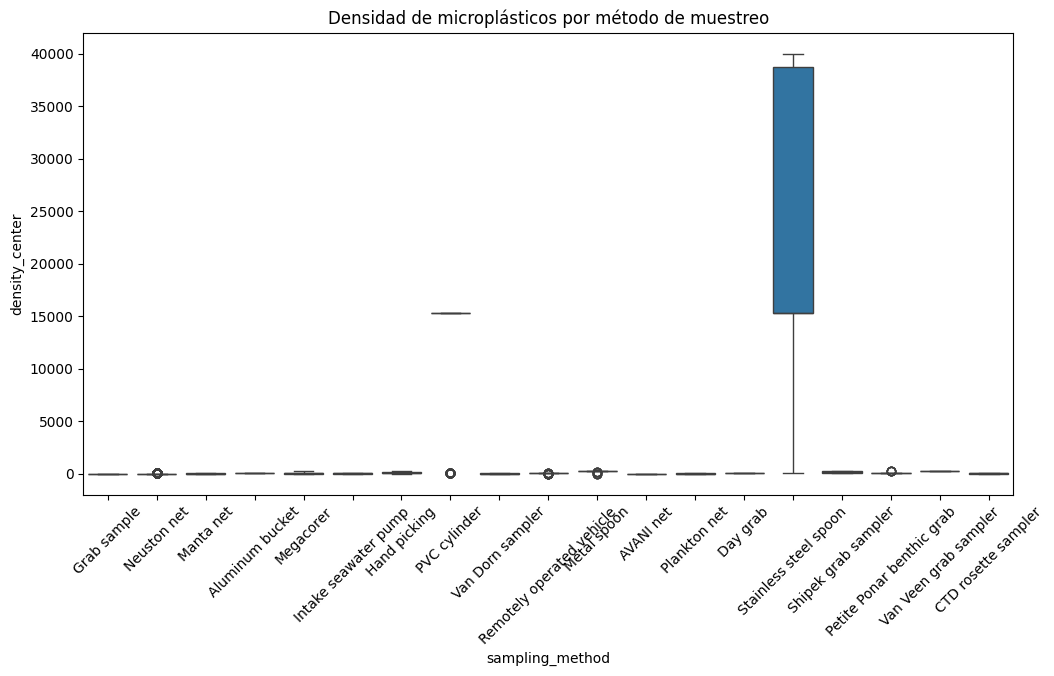

Estadístico F: 4196.86, p-valor: 0.0000
→ Hay diferencias significativas entre los métodos de muestreo.


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Filtrar datos válidos
d_studio = df_clean.dropna(subset=['sampling_method', 'density_center'])

# Boxplot para visualizar diferencias
plt.figure(figsize=(12,6))
sns.boxplot(x='sampling_method', y='density_center', data=df_clean)
plt.xticks(rotation=45)
plt.title('Densidad de microplásticos por método de muestreo')
plt.show()

# Prueba ANOVA para ver si hay diferencias significativas
grupos = [group['density_center'].values for name, group in df_clean.groupby('sampling_method')]
f_stat, p_val = f_oneway(*grupos)

print(f"Estadístico F: {f_stat:.2f}, p-valor: {p_val:.4f}")
if p_val < 0.05:
    print("→ Hay diferencias significativas entre los métodos de muestreo.")
else:
    print("→ No se encontraron diferencias significativas.")


Sí, hay diferencias significativas en la densidad de microplásticos según el método de muestreo.

Esto significa que el método de recolección influye directamente en la cantidad de microplásticos que se detectan. Es un hallazgo muy importante, sobre todo si se busca comparar datos de distintos estudios o regiones.